#  Problem Statement:
Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store;
it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review 
of the literature, theories and models have been carried out to propose the models for customer activation and customer
retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, 
system quality, information quality, trust and net benefit. The research furthermore investigated the factors that 
 influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values
 are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online 
shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [1]:
# Import libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the csv file
data=pd.read_csv('Customer_Retention.csv')

In [3]:
# see all the rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
data.head(2)

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome                                                                                 

  12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     \
0                                      Search Engine                                                                                                               
1                                      Search Engine                                                                                                               

  13 After first visit, how do you reach the online retail store?\t\t\t\t                                                     \
0                                      Search Engine                                                                           
1                                    Via application                                                                           

  14 How much time do you explore the e- retail store before making a purchase decision?                                                                     \
0                                          6-10 mins                                                                                                          
1                                  more than 15 mins                                                                                                          

  15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                 \
0                 E-wallets (Paytm, Freecharge etc.)                                                                                                                                   
1                                

In [5]:
data.shape

(269, 71)

We can see some tabs and also question number with the queries which should be removed from the features for further use

In [6]:
from string import digits,punctuation,whitespace

In [7]:
# Removing Question No.
Q_number=str.maketrans('','',digits)
data.columns=data.columns.str.translate(Q_number)

In [8]:
# Removing tab 

data.columns=data.columns.str.replace('\t','')

#Remove any other spaces :
data.columns=data.columns.str.strip()

In [9]:
data.head(2)

Gender of respondent How old are you? Which city do you shop online from?  \
0                 Male      31-40 years                               Delhi   
1               Female      21-30 years                               Delhi   

   What is the Pin Code of where you shop online from?  \
0                                             110009     
1                                             110030     

  Since How Long You are Shopping Online ?  \
0                            Above 4 years   
1                            Above 4 years   

  How many times you have made an online purchase in the past  year?  \
0                                        31-40 times                   
1                                 41 times and above                   

  How do you access the internet while shopping on-line?  \
0                                            Dial-up       
1                                              Wi-Fi       

  Which device do you use to access the online shopping?  \
0                                            Desktop       
1                                         Smartphone       

  What is the screen size of your mobile device?  \
0                                         Others   
1                                     4.7 inches   

  What is the operating system (OS) of your device?  \
0                             Window/windows Mobile   
1                                           IOS/Mac   

  What browser do you run on your device to access the website?  \
0                                      Google chrome              
1                                      Google chrome              

  Which channel did you follow to arrive at your favorite online store for the first time?  \
0                                      Search Engine                                         
1                                      Search Engine                                         

  After first visit, how do you reach the online retail store?  \
0                                      Search Engine             
1                                    Via application             

  How much time do you explore the e- retail store before making a purchase decision?  \
0                                          6-10 mins                                    
1                                  more than 15 mins                                    

  What is your preferred payment Option?  \
0     E-wallets (Paytm, Freecharge etc.)   
1                     Credit/Debit cards   

  How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?  \
0                                          Sometimes                                                          
1                                    Very frequently                                                          

  Why did you abandon the �Bag�, �Shopping Cart�?  \
0                                   Lack of trust   
1                       Promo code not applicable   

  The content on the website must be easy to read and understand  \
0                                          Agree (4)               
1                                 Strongly agree (5)               

  Information on similar product to the one highlighted  is important for product comparison  \
0                                    Indifferent (3)                                           
1                                 Strongly agree (5)                                           

  Complete information on listed seller and product being offered is important for purchase decision.  \
0                                    Indifferent (3)                                                    
1                                 Strongly agree (5)                                                    

  All relevant information on listed products must be stated clearly  \
0                                          Agree (4)                   
1              

In [10]:
# See the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Gender of respondent                                                                                       269 non-null    object
 1   How old are you?                                                                                           269 non-null    object
 2   Which city do you shop online from?                                                                        269 non-null    object
 3   What is the Pin Code of where you shop online from?                                                        269 non-null    int64 
 4   Since How Long You are Shopping Online ?                                        

Except Pincode(int) all other columns are object type with no null values

In [11]:
# Find for unique values

data.nunique()

Gender of respondent                                                                                          2
How old are you?                                                                                              5
Which city do you shop online from?                                                                          11
What is the Pin Code of where you shop online from?                                                          39
Since How Long You are Shopping Online ?                                                                      5
How many times you have made an online purchase in the past  year?                                            6
How do you access the internet while shopping on-line?                                                        4
Which device do you use to access the online shopping?                                                        4
What is the screen size of your mobile device?                                                          

In [12]:
data.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

# Dealing with personal Details 

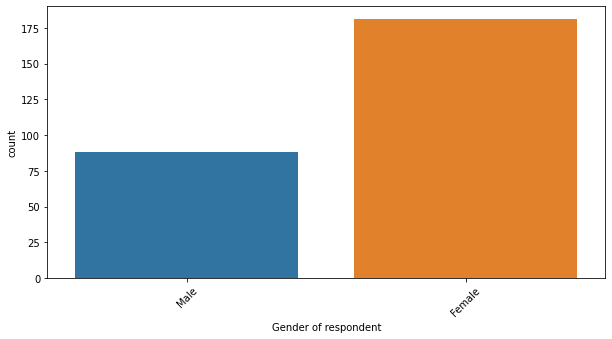

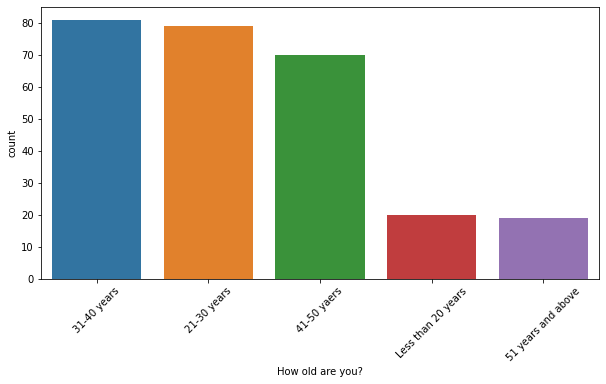

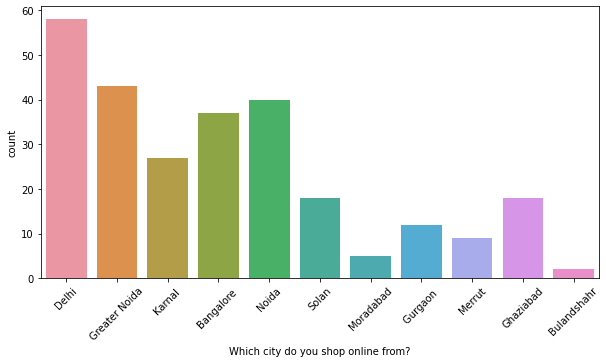

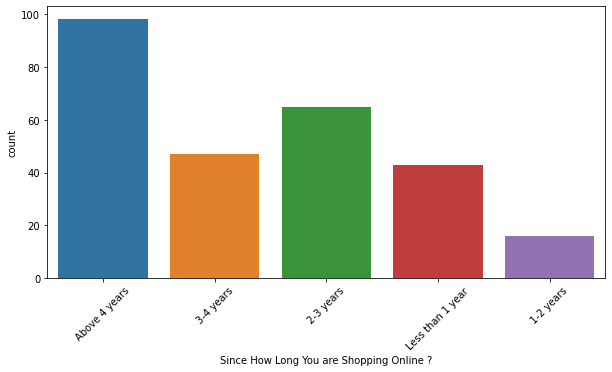

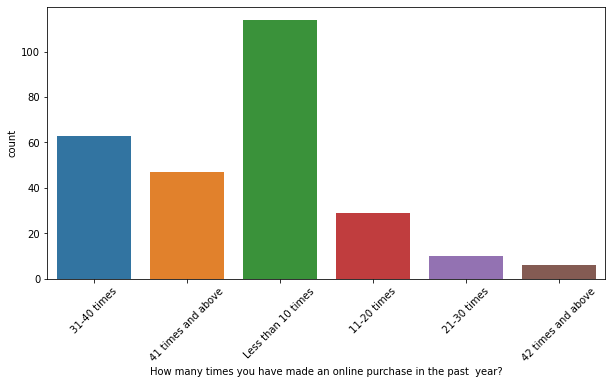

In [13]:
personal_info=['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?']
for i in personal_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(10,5))
        sns.countplot(data[i])
        plt.xticks(rotation=45)
        plt.show()

Observation:


    1. Female response is more than male almost double the male candidates.
    2. 31 to 40 years old are responding most followed by 21-30yrs then 41-50yrs.
    3. Delhi people responding max then Noida and then Greater Noida.
    4. The people shopping over 4 years are most in number.
    5. Purchase in the past year is less than 10 times which should be increased. Mainly above 42 times band. 

# Pie chart on Personal Details

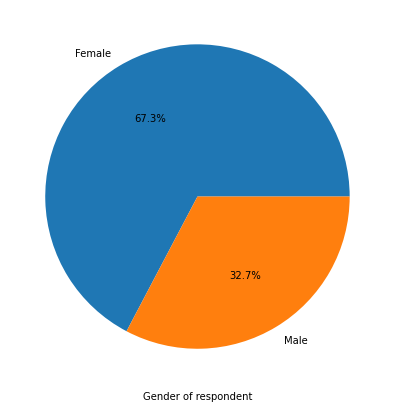

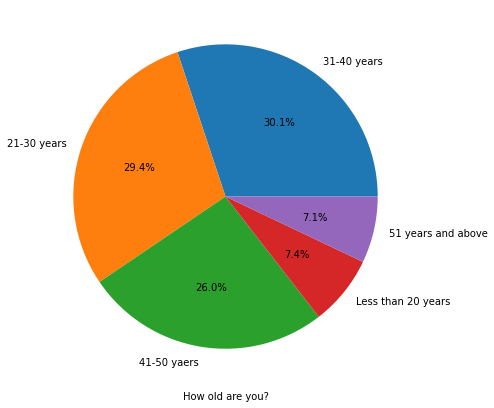

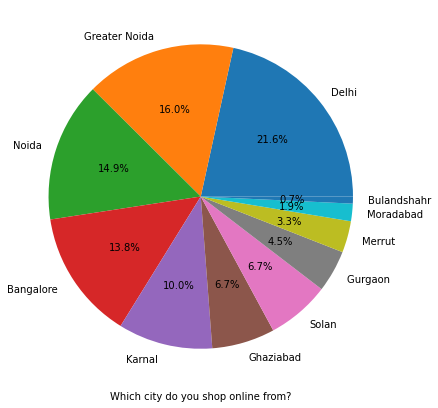

In [14]:

personal_detail=['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?']
for i in personal_detail:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(7,7))
        data[i].value_counts().plot.pie(autopct='%1.1f%%')
        plt.xlabel(i)
        plt.ylabel('')
        plt.show()

The above Pie Plot represents some personal information with absolute % and Catergory

In [15]:
data['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',inplace=True)

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

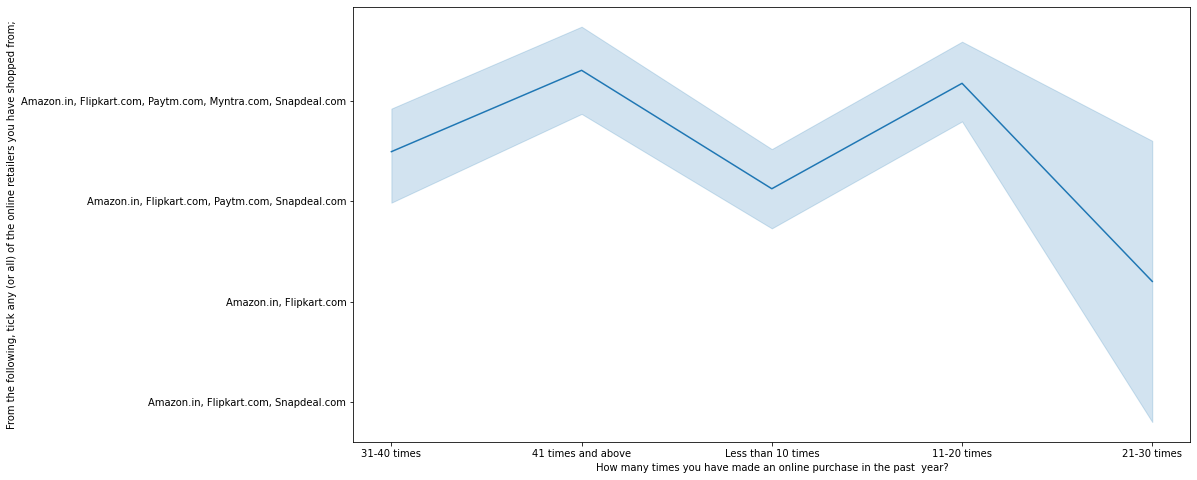

In [16]:
 plt.figure(figsize=(15,8))
sns.lineplot(data['How many times you have made an online purchase in the past  year?'],
             data['From the following, tick any (or all) of the online retailers you have shopped from;'])

Observation:
1. People shopping for 41 times and above times  and also 11 yo 20 times includes all the five sites mentioned.
2. People shopping for 31-40 times, less than 10 times exclude mytra.com.
3. People shopping for 21-30 times  generally choose amazon and flipcart.


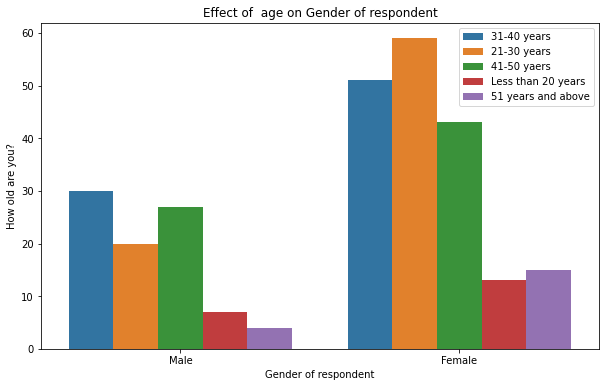

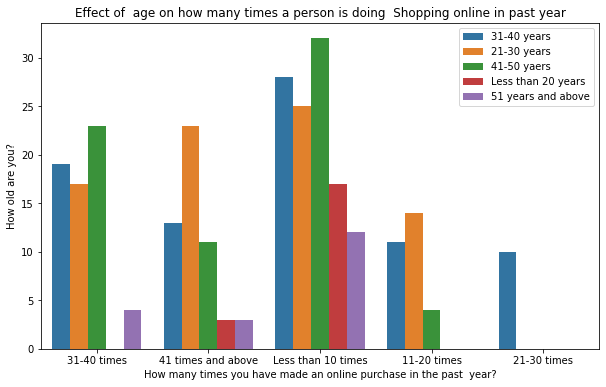

In [30]:
# Lets See how 'Since How Long You are Shopping Online' is related to 'age' group
plt.figure(figsize=(10,6))
sns.countplot(data['Gender of respondent'],hue=data['How old are you?'])
plt.xlabel('Gender of respondent')
plt.ylabel('How old are you?')
plt.title('Effect of  age on Gender of respondent')
plt.legend(loc='upper right')
plt.show()


# Lets See how 'Since How Long You are Shopping Online' is related to 'age' group
plt.figure(figsize=(10,6))
sns.countplot(data['Since How Long You are Shopping Online ?'],hue=data['How old are you?'])
plt.xlabel('Since How Long You are Shopping Online ?')
plt.ylabel('How old are you?')
plt.title('Effect of  age on span of Shopping online')
plt.legend(loc='upper right')
plt.show()


# Lets See how 'How many times you have made an online purchase in the past  year?' is related to 'age' group
plt.figure(figsize=(10,6))
sns.countplot(data['How many times you have made an online purchase in the past  year?'],hue=data['How old are you?'])
plt.xlabel('How many times you have made an online purchase in the past  year?')
plt.ylabel('How old are you?')
plt.title('Effect of  age on how many times a person is doing  Shopping online in past year')
plt.legend(loc='upper right')
plt.show()

Observation:

1. Female of 21-30 years is responding most whereas male of 31-40 years responding most.
2. Less than 20 years  and more than 50 years age people are spending less time in shopping.
3. Age group of 21-50 years are spending most dutind last 4 years.
4. Age group of 21-50 years people are spending most in all categories of no of times online purchases in past year but maximum is less than 10 years which needs to be increased.

# As we see that customer's device detail is not related or making much impact on customer .

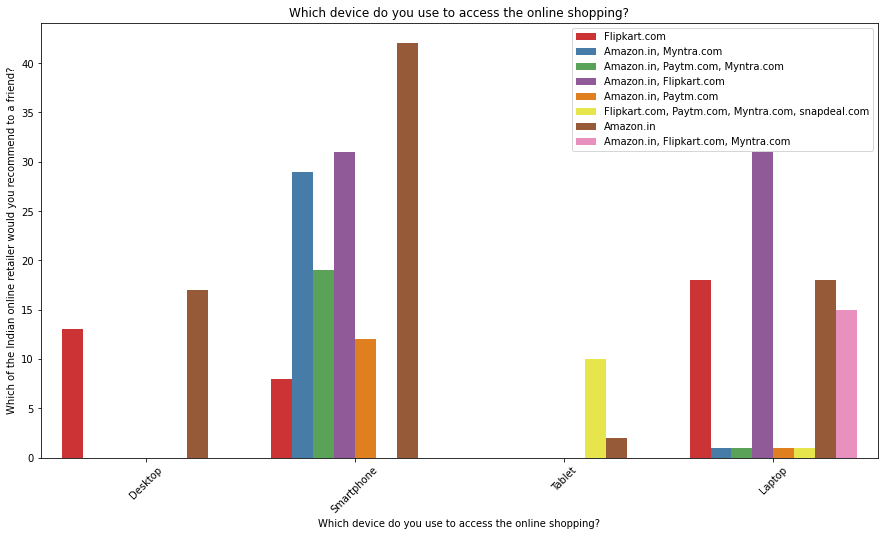

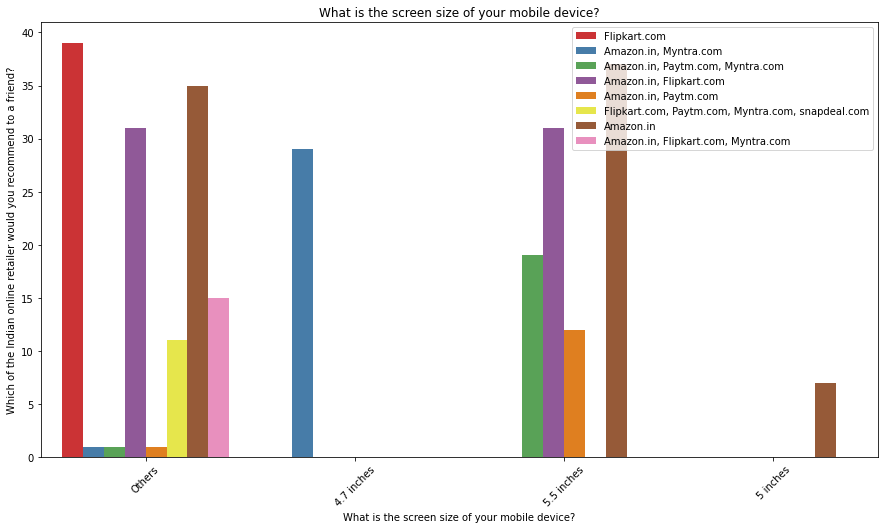

In [35]:
Device_specification=['How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',]
for i in Device_specification:
    plt.figure(figsize=(15,8))
    sns.countplot(data[i],hue=data['Which of the Indian online retailer would you recommend to a friend?'],palette="Set1")
    plt.xlabel(i)
    plt.ylabel('Which of the Indian online retailer would you recommend to a friend?')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

From the above plotting we can clearly observe that most of the users are mobile users ,using mobile internet, of no such restrictions on screen size  but yes mostly people are using Windows or Windows mobile.

Most of the feedbacks are collected from Amazon.in

# Customer_activity before shopping

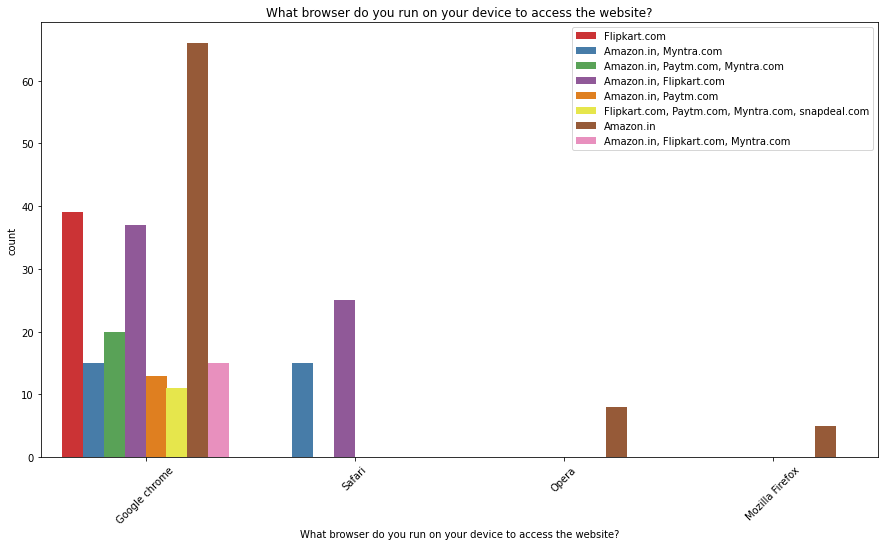

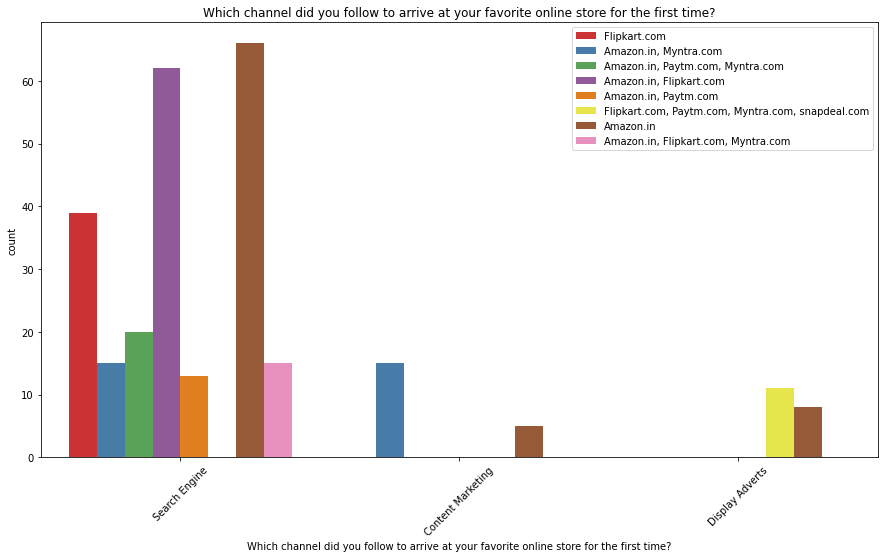

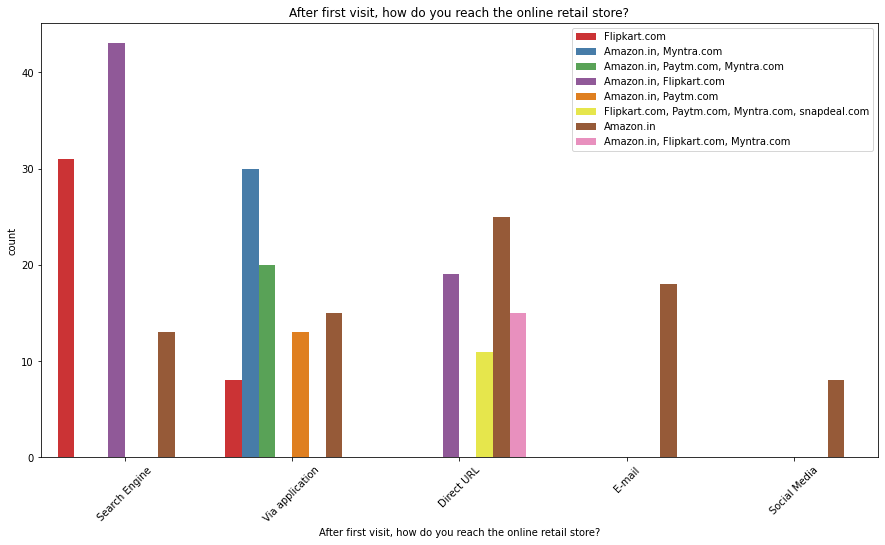

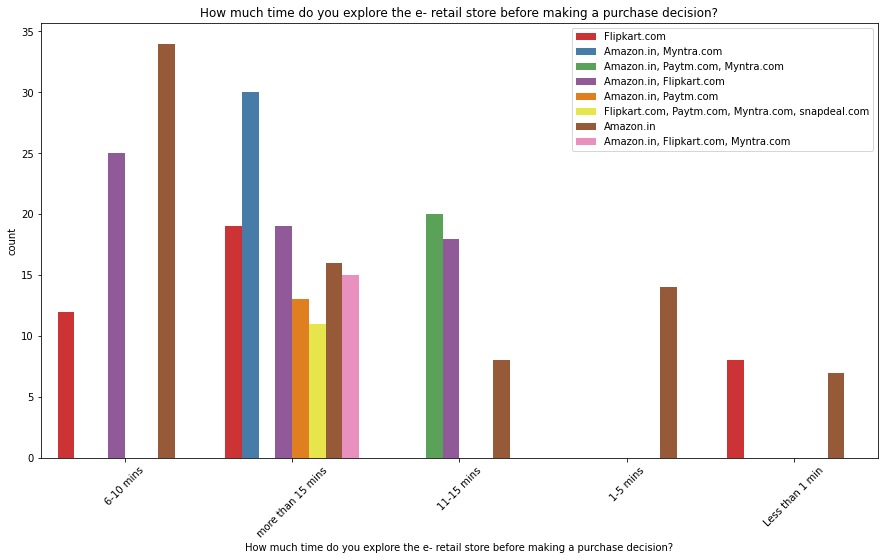

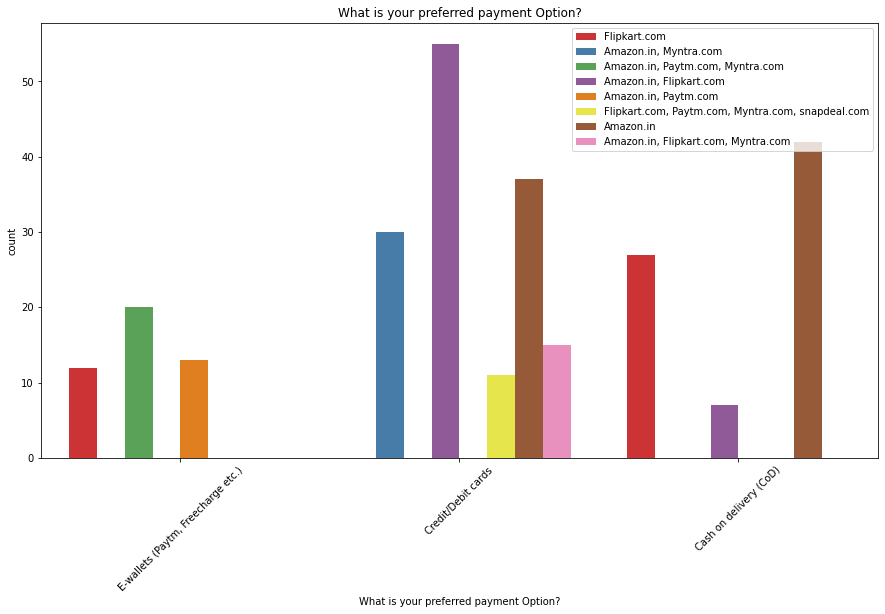

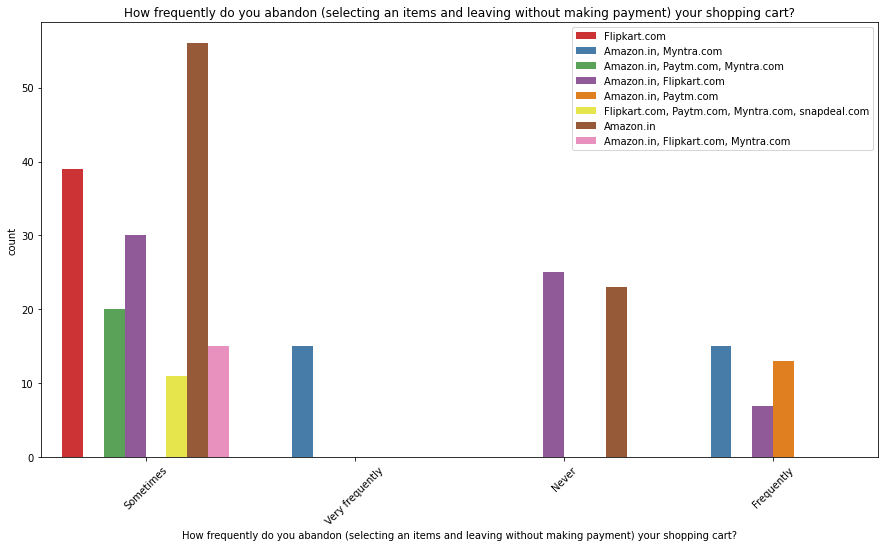

In [38]:
Customer_activity=['What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
       'Why did you abandon the �Bag�, �Shopping Cart�?',]
for i in Customer_activity:
    plt.figure(figsize=(15,8))
    sns.countplot(data[i],hue=data['Which of the Indian online retailer would you recommend to a friend?'],palette="Set1")
    plt.xlabel(i)
    #plt.ylabel('Which of the Indian online retailer would you recommend to a friend?')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

Observation:
    
    1. Google chrome is the most preferred browser through serach engine.
    2. Second visit is also through search engine.
    3. Amazon and Flipcart users spend between 6 to 10 mins.
    4. The most preffered payment mode is credit and debit card.
    5. We can clearly observe that most of the time people abandon the bag is beacuse they get a better alternative offer or promo code not applicable.
    6. There is also lack of trust seen in Amazon, Flipkart and paytm by some people follwed by Snap deal and Myntra.

# We next should be dealing with services the websites are providing

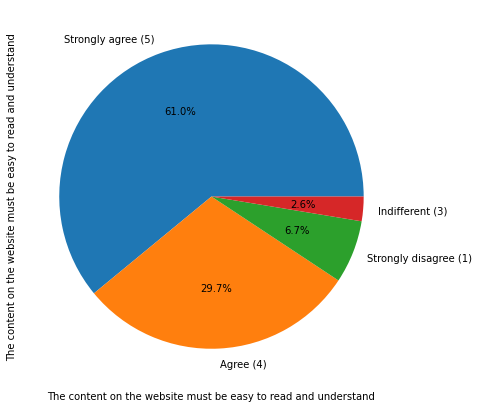

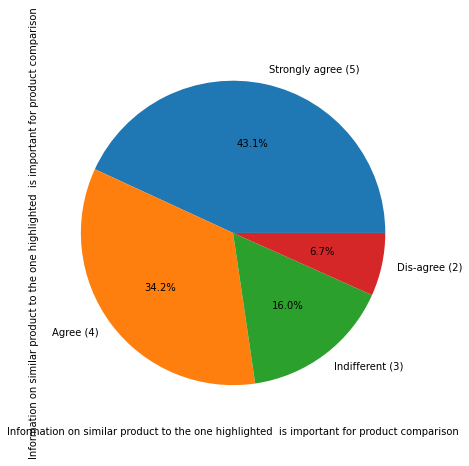

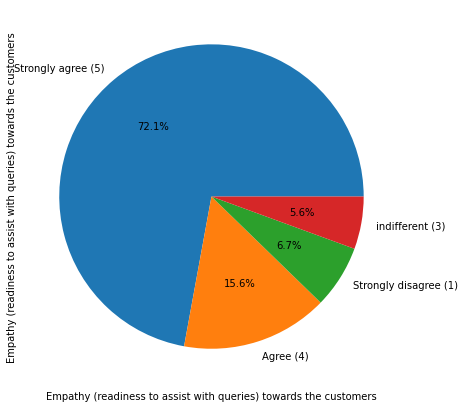

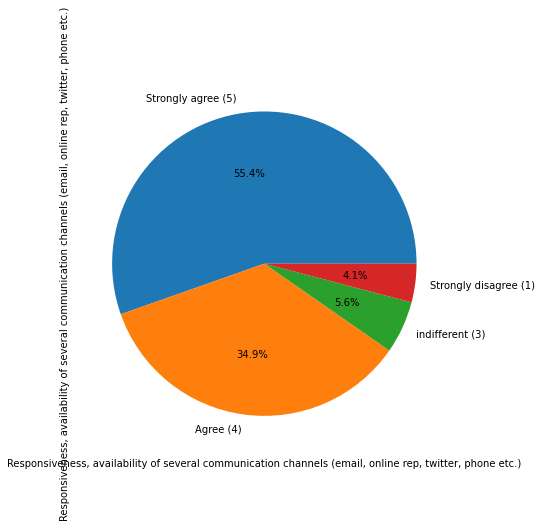

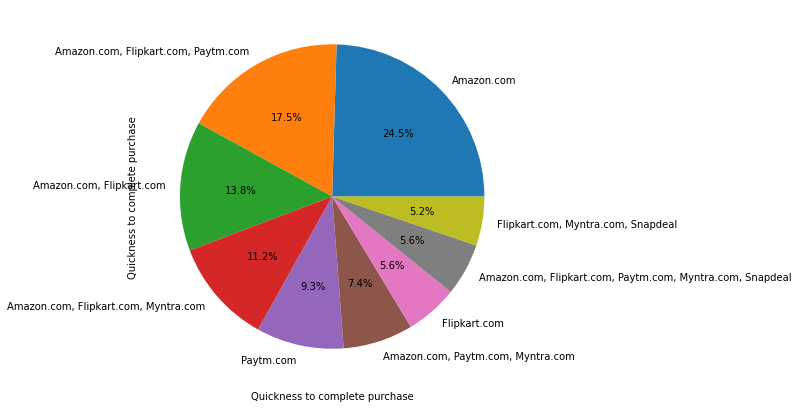

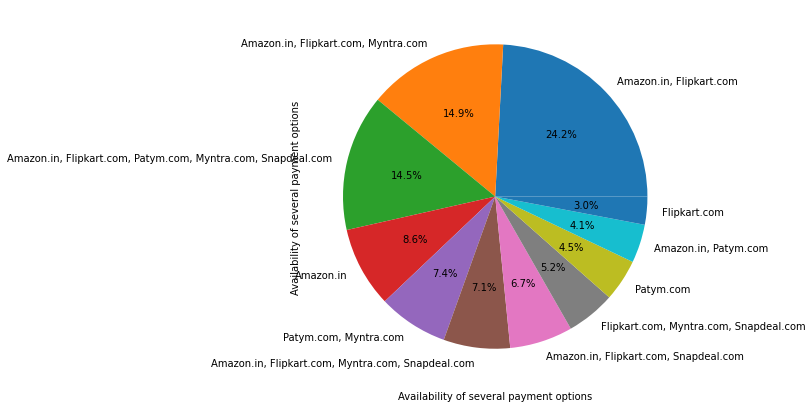

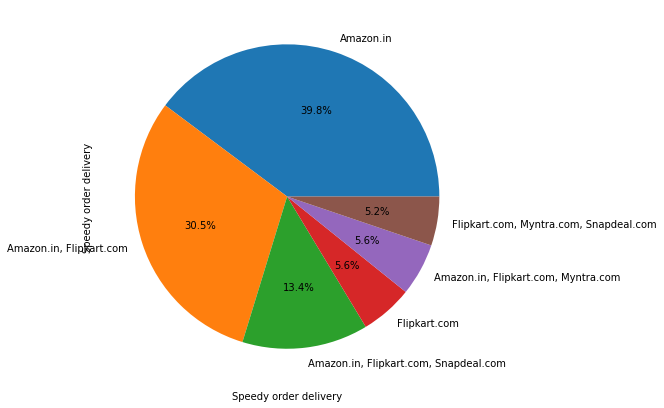

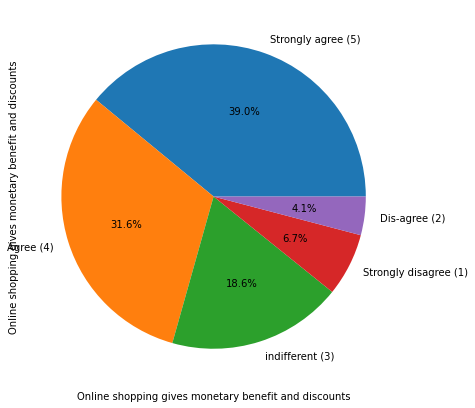

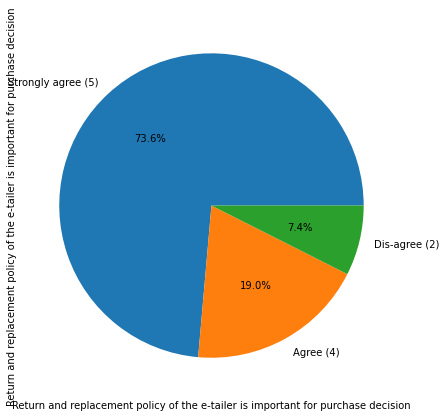

In [31]:
 Services=['The content on the website must be easy to read and understand',
       'Information on similar product to the one highlighted  is important for product comparison',
       'Complete information on listed seller and product being offered is important for purchase decision.',
       'All relevant information on listed products must be stated clearly',
       'Ease of navigation in website', 'Loading and processing speed',
       'User friendly Interface of the website', 'Convenient Payment methods',
       'Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       'Empathy (readiness to assist with queries) towards the customers',
       'Being able to guarantee the privacy of the customer',
       'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
         'Quickness to complete purchase','Availability of several payment options', 'Speedy order delivery',
         'Online shopping gives monetary benefit and discounts',
         'Return and replacement policy of the e-tailer is important for purchase decision']
    
    
for i in Services:
    plt.figure(figsize=(7,7))
    data[i].value_counts().plot.pie(autopct='%1.1f%%',)
    plt.xlabel(i)
    #plt.ylabel('')
    
    plt.show()
    

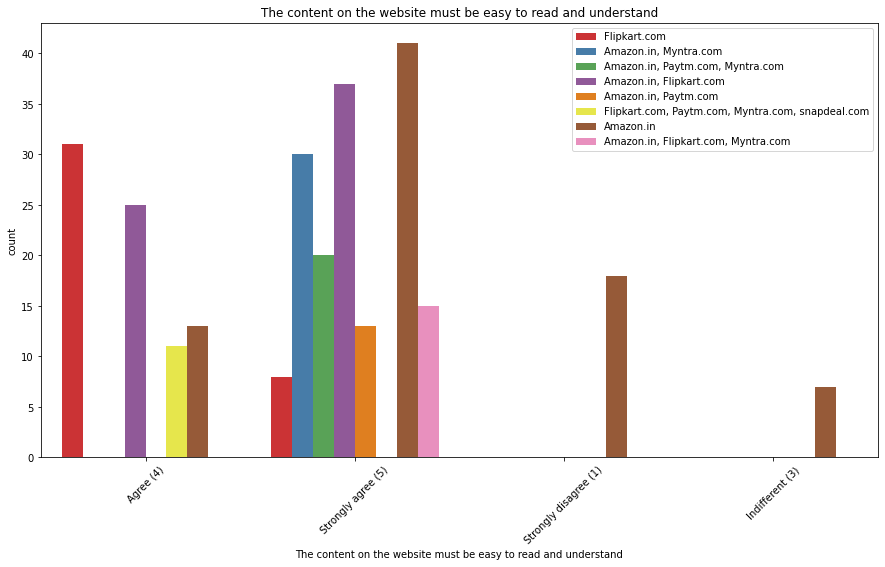

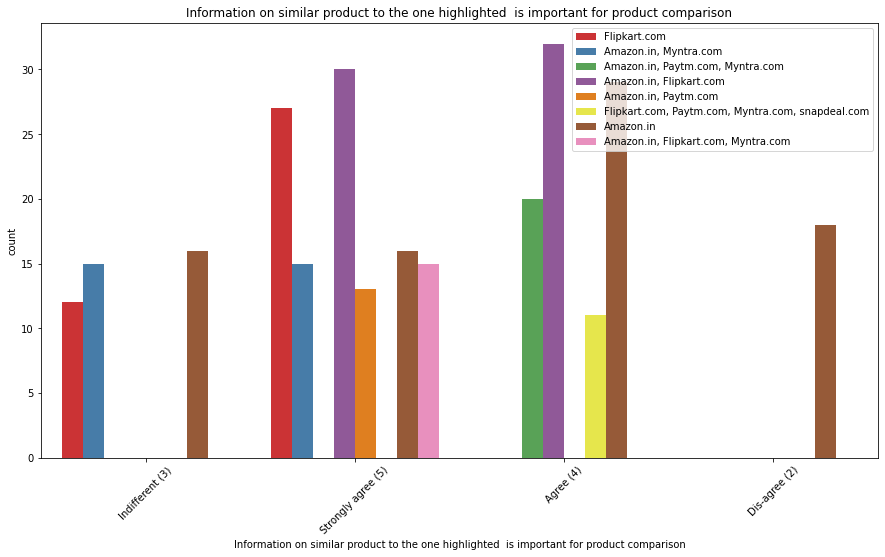

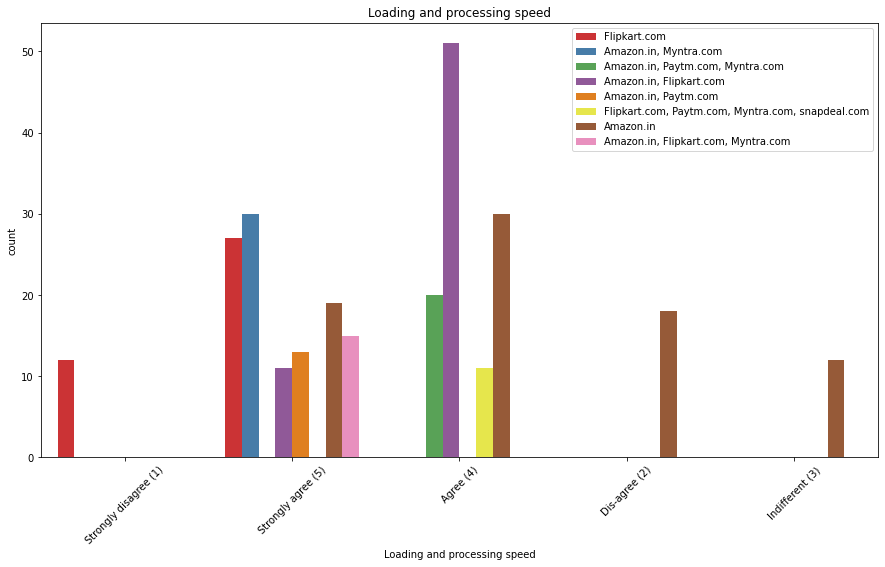

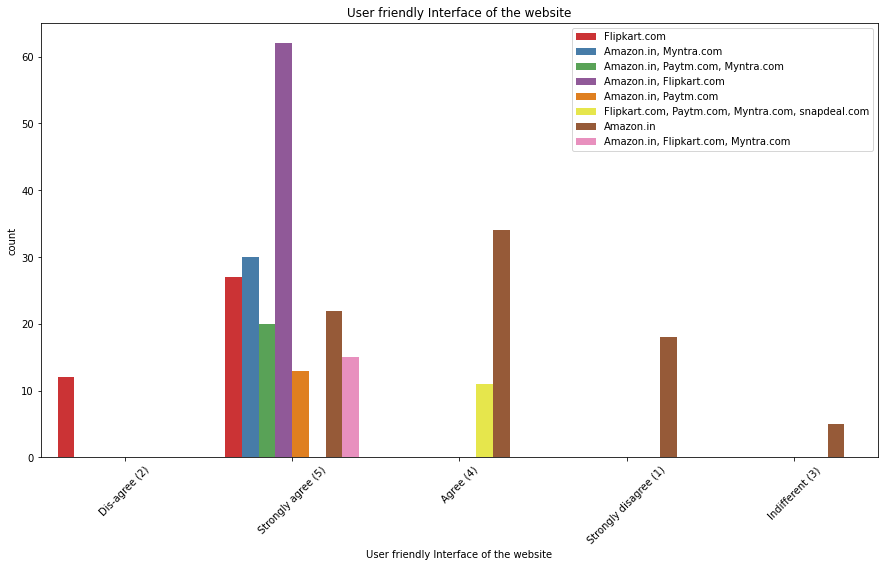

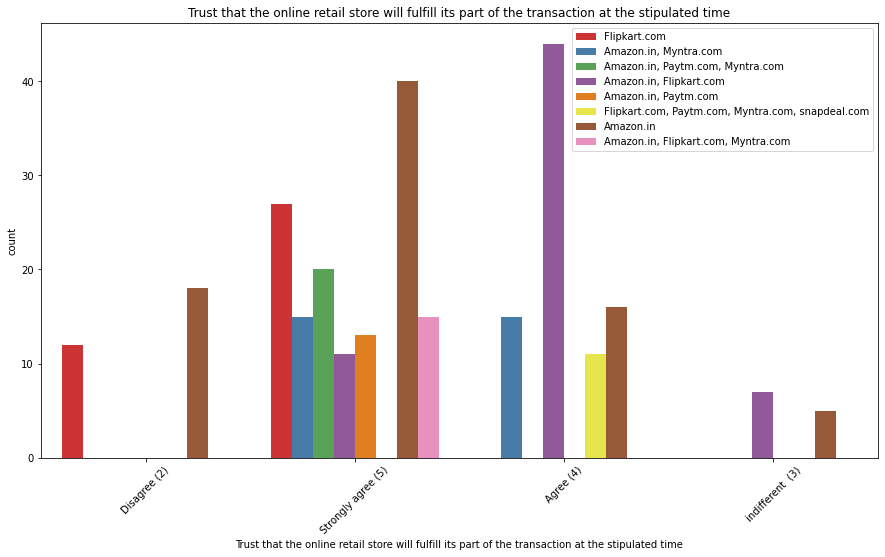

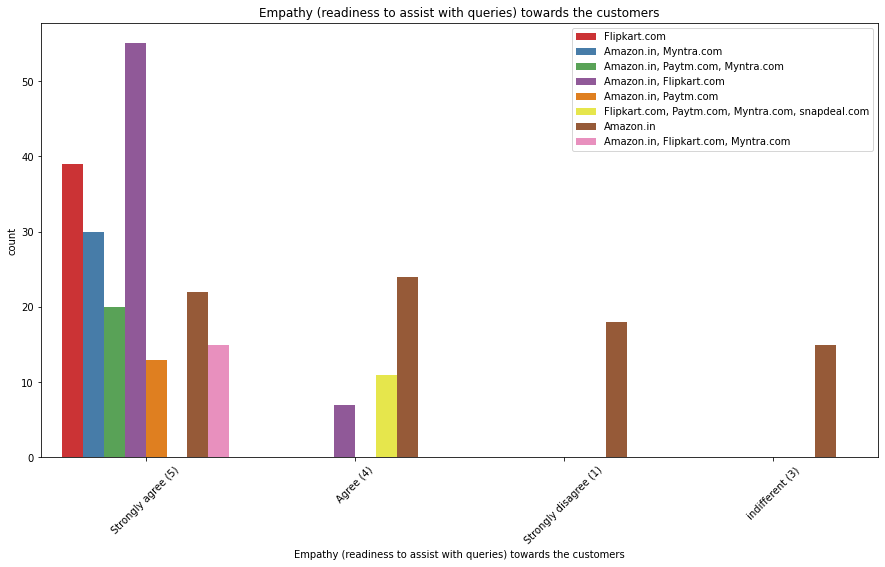

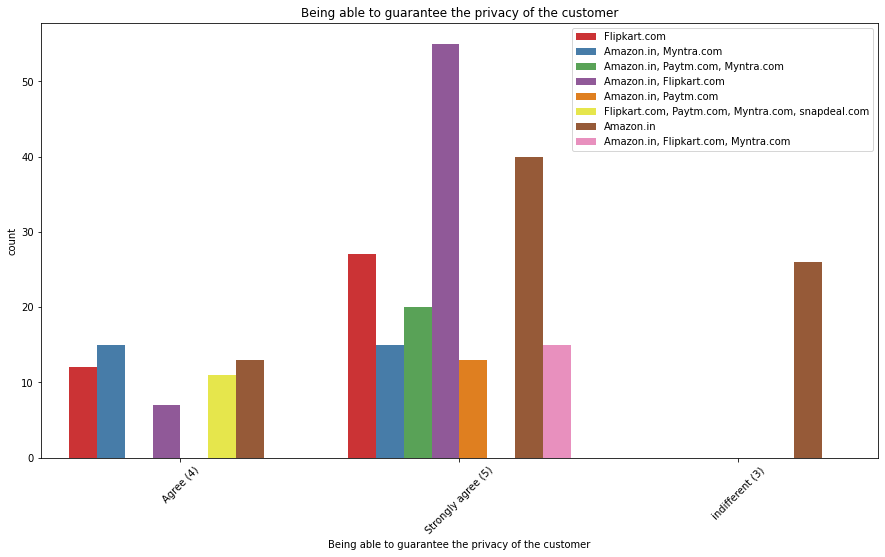

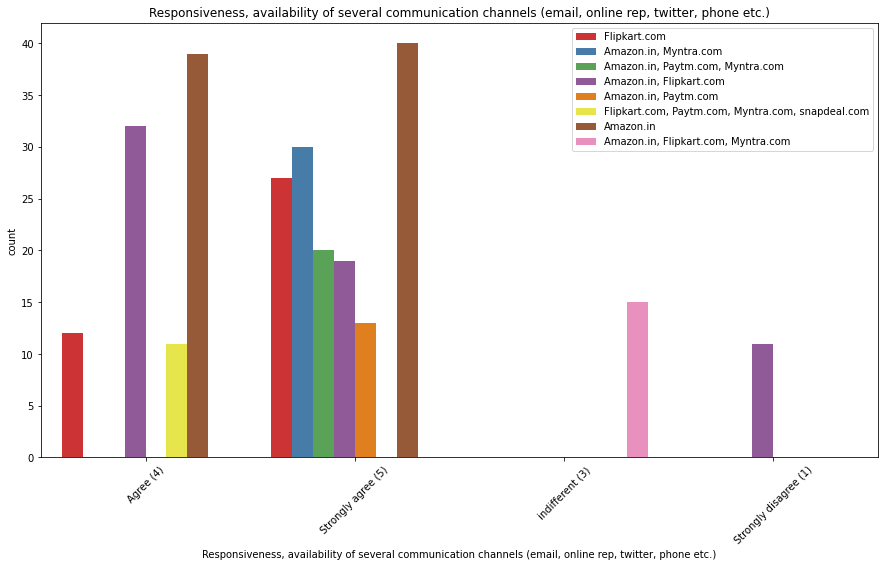

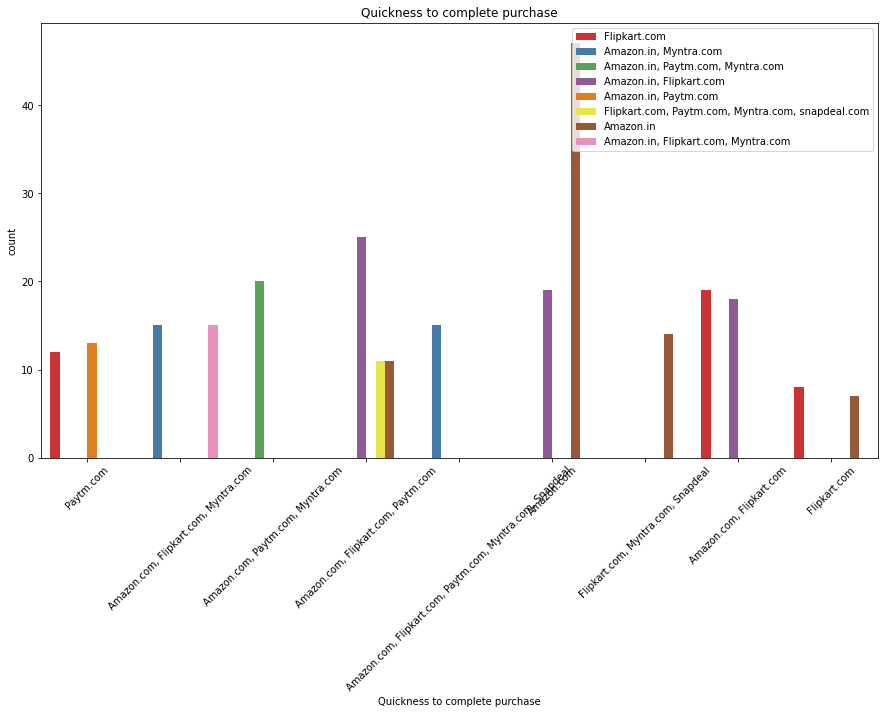

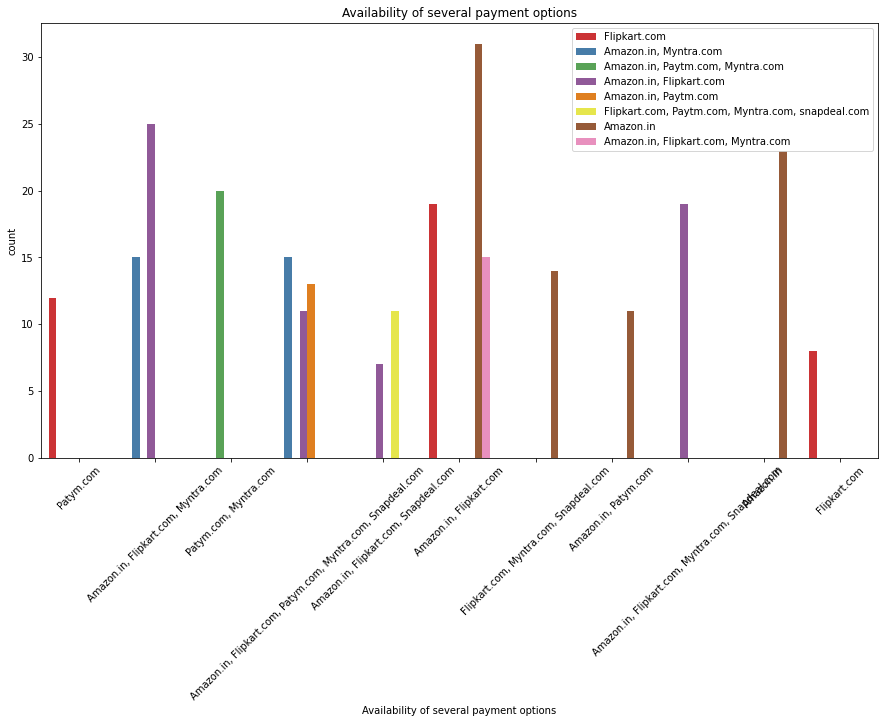

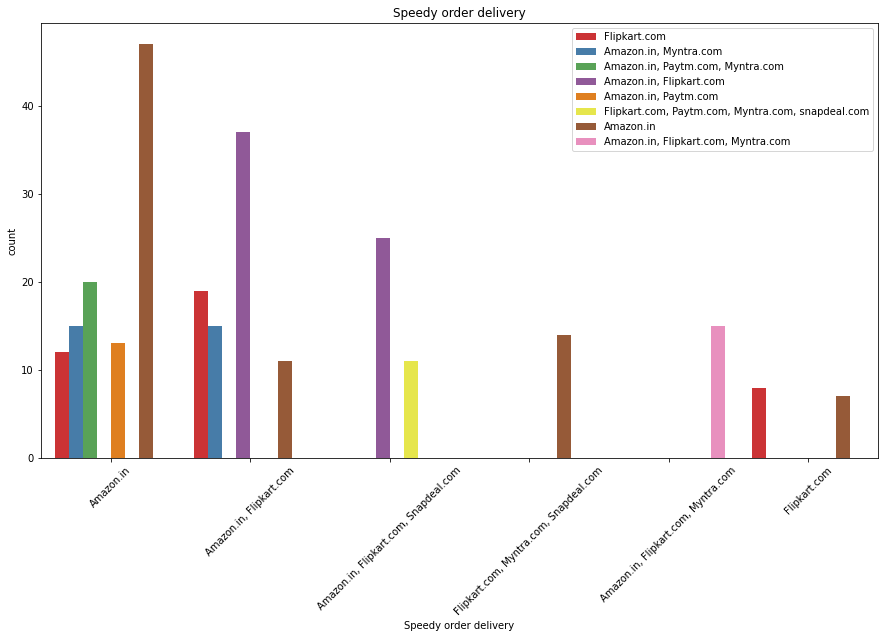

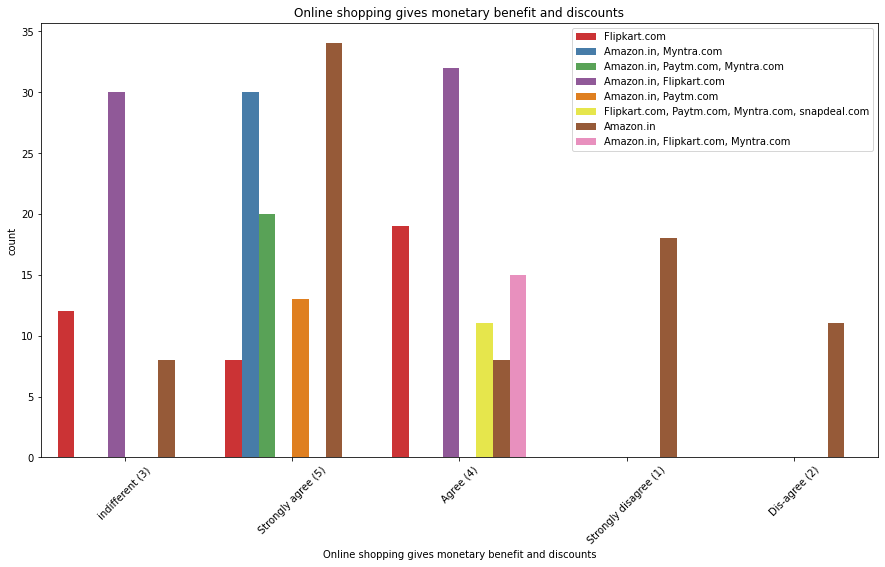

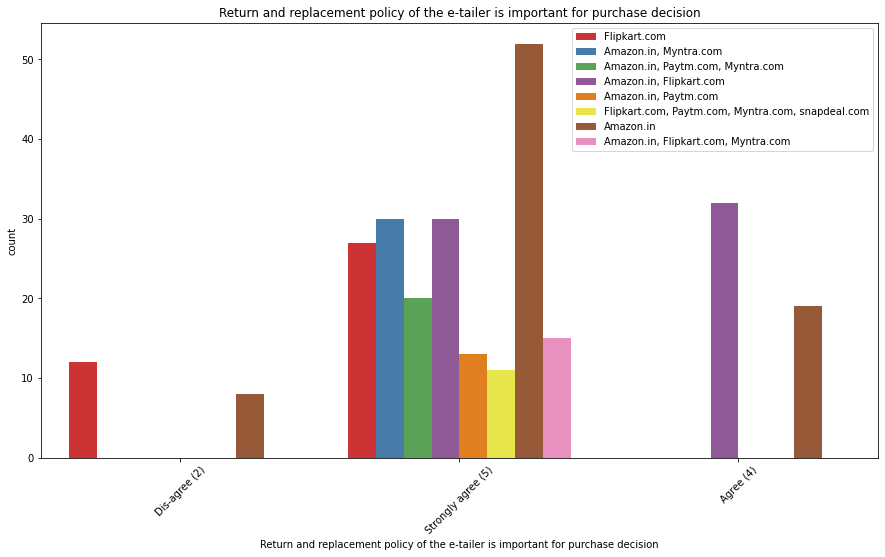

In [19]:
Services=['The content on the website must be easy to read and understand',
       'Information on similar product to the one highlighted  is important for product comparison',
       'Complete information on listed seller and product being offered is important for purchase decision.',
       'All relevant information on listed products must be stated clearly',
       'Ease of navigation in website', 'Loading and processing speed',
       'User friendly Interface of the website', 'Convenient Payment methods',
       'Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       'Empathy (readiness to assist with queries) towards the customers',
       'Being able to guarantee the privacy of the customer',
       'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
         'Quickness to complete purchase','Availability of several payment options', 'Speedy order delivery',
         'Online shopping gives monetary benefit and discounts',
         'Return and replacement policy of the e-tailer is important for purchase decision']
    
for i in Services:
    plt.figure(figsize=(15,8))
    sns.countplot(data[i],hue=data['Which of the Indian online retailer would you recommend to a friend?'],palette="Set1")
    plt.xlabel(i)
    # plt.ylabel('How old are you?')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

Observation:
1. 61% people strongly agree that the website should be easy to understand and recommending Amazon for that  followed by Amazon and Flipcart combination.

2. 43% people strong agree that information on similar product highlighted is important for product comparision specially people using combination of Flipcart and Amazon.

3. Most of the Amazon customer agree and strongly agree that complete information for purchasig dicision.

4. Around 40% people those using Amazon and Flipcart are strong agreeing that all relevent information on listed products must be clearly stated . So the sites should work upon the information part so that the existing customers recommend the site to their friends.

5. Around 52.4% people strongly agree that if the sites are easy to navigate they can increase new customers from the exsisting friends recommendation.

6. Around 50 % Amazon and flipcart user believe that loading and processing speed mattersa lot and basis on that they can recommend their friend .

7. Paymode also plays an important role for suggesting new customers.

8. When it comes to privacy people are really concerned so 69 % user suggest or recommened if they find the site to be very safe.So all the websites should work upon this part to retain yheir esisting customers aa well as increase new one.

9. 72% people strongly agrees that Empathy (readiness to assist with queries) towards the customers.
10. Around 69% people strongly believe that Flip cart and amazon is giving garuntee on customer privacy.
11. Amazon is the most responsive site for the customers as it shows.
12. Quickness in purchase is highest in case of Amazon.in.
13. Speedy Order delivery rate is highest for Amazon followed by Combination of Amazon and Flipcart.
14. Around 71% of people believe that monetary discount matters a lot for making a order.


# Seeing the dataset we can clearly identify that label feature  is
# 'Which of the Indian online retailer would you recommend to a friend?'

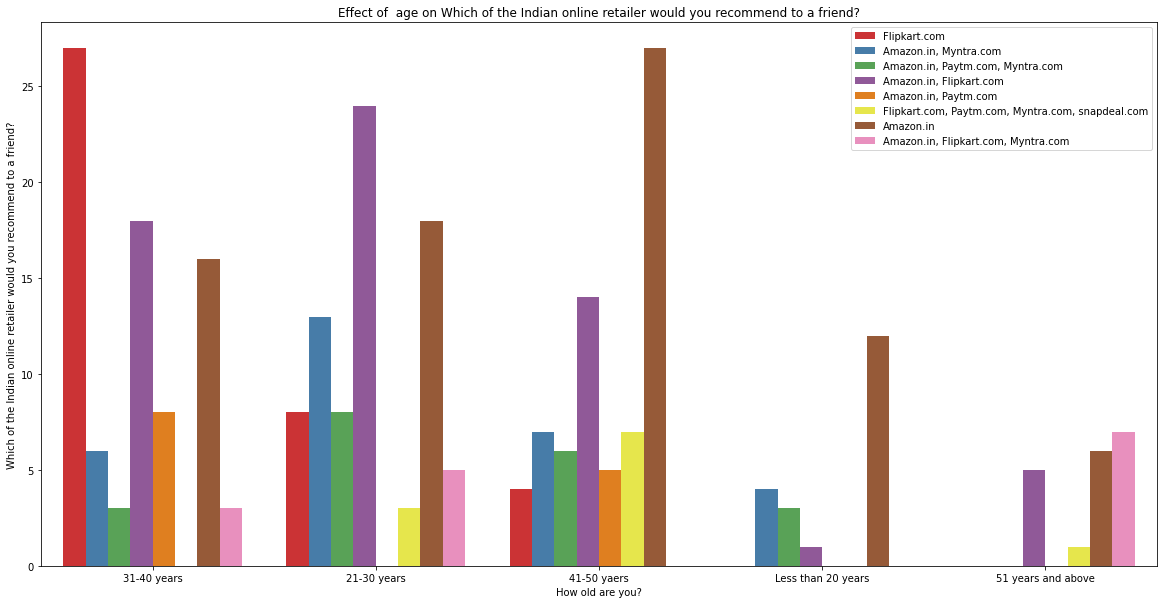

In [20]:

plt.figure(figsize=(20,10))
sns.countplot(data['How old are you?'],hue=data['Which of the Indian online retailer would you recommend to a friend?'],palette="Set1")
plt.xlabel('How old are you?')
plt.ylabel('Which of the Indian online retailer would you recommend to a friend?')
plt.title('Effect of  age on Which of the Indian online retailer would you recommend to a friend?')
plt.legend(loc="upper right")
plt.show()

Observation: 

1. FLIP CART is the most recommended site  in the age group of 31-40 years whereas AMAZON having highest preferrence in the age group of 41 -50 years.
2. AMAZON is mostly preffered by all the age groups more or less but preferred As compared to FLIP CART.
3. Less than 20 years and more than 51 years people are very less active in all the sites.
4. People living the combination of Amazon and Flipcart is highly seen almost all age group.


<AxesSubplot:xlabel='Why did you abandon the �Bag�, �Shopping Cart�?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

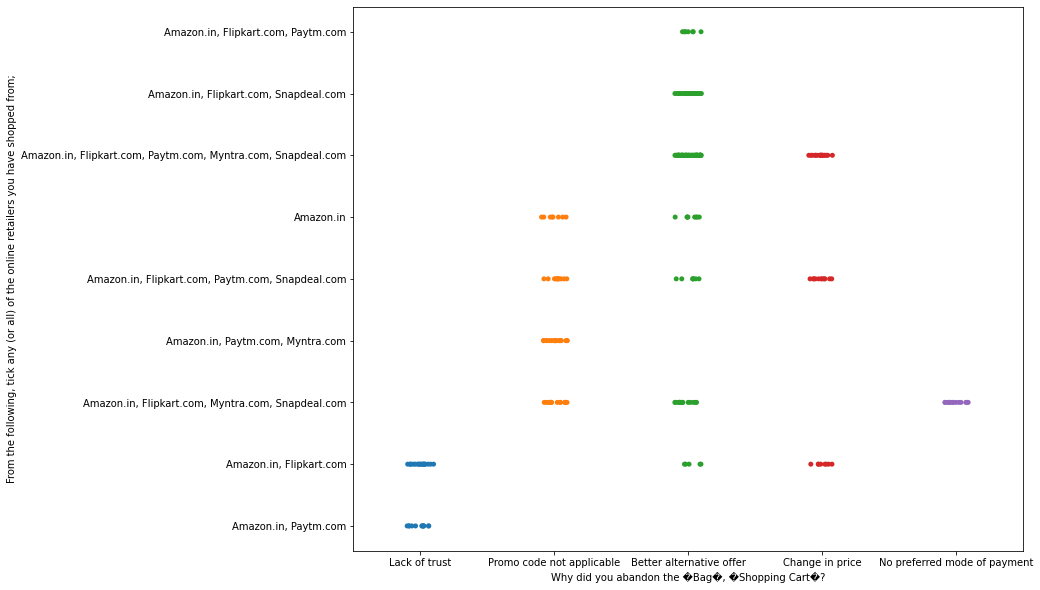

In [21]:
plt.figure(figsize=(12,10))
sns.stripplot(data['Why did you abandon the �Bag�, �Shopping Cart�?'],
              data['From the following, tick any (or all) of the online retailers you have shopped from;'])

We can clearly observe that most of the time people abandon the bag is beacuse they get a better alternative offer or 
promo code not applicable. 

There is also lack of trust seen in Amazon, Flipkart and paytm by some people follwed by Snap deal and Myntra.



# Policies and commitments

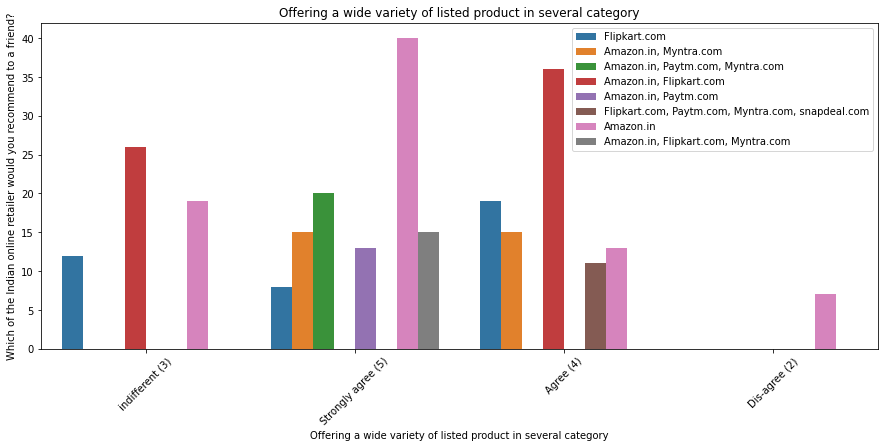

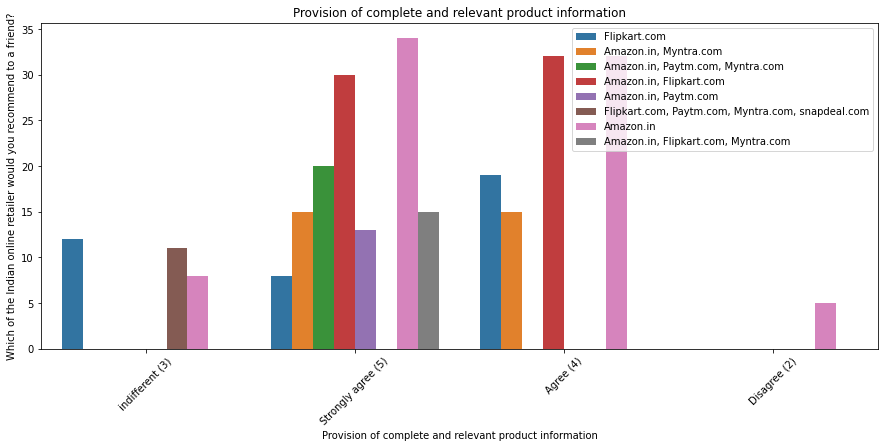

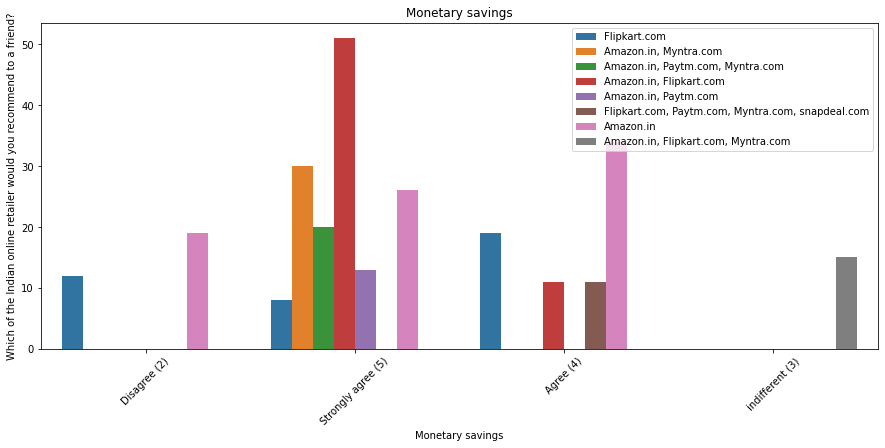

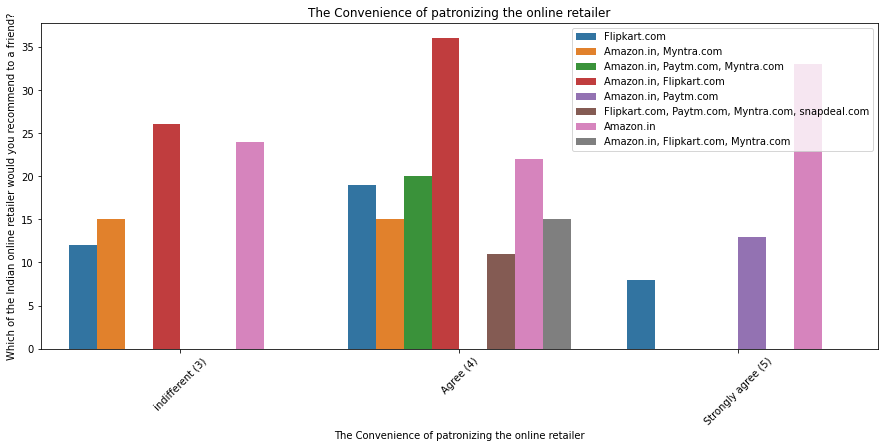

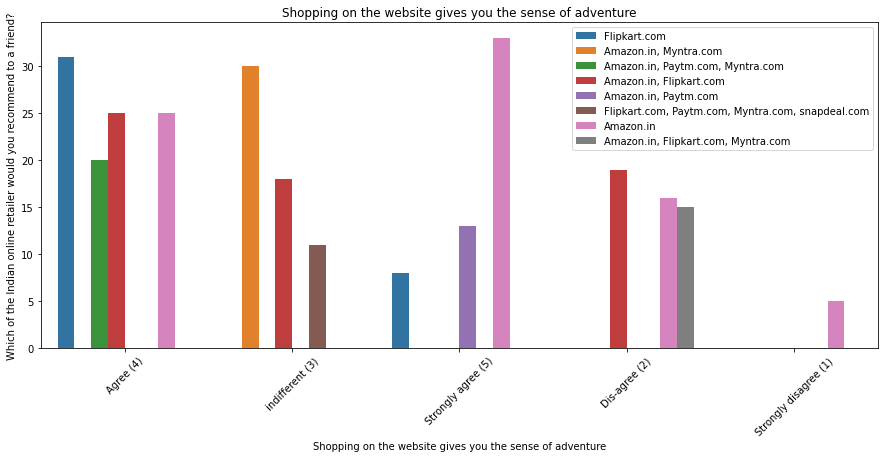

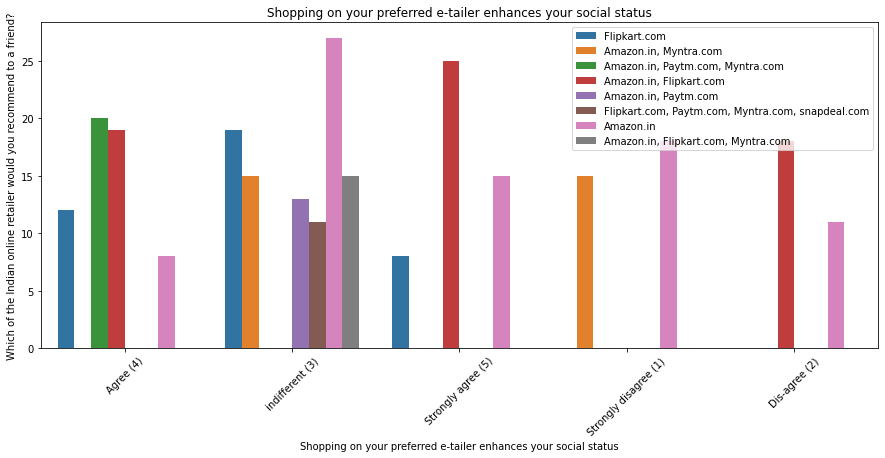

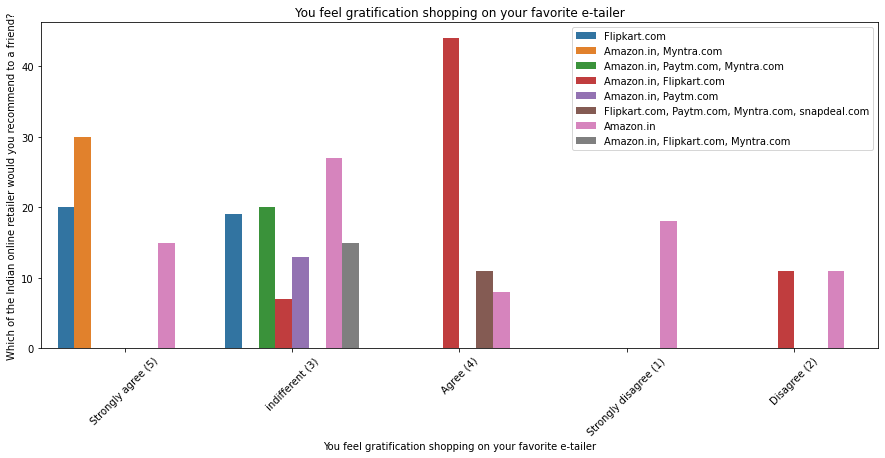

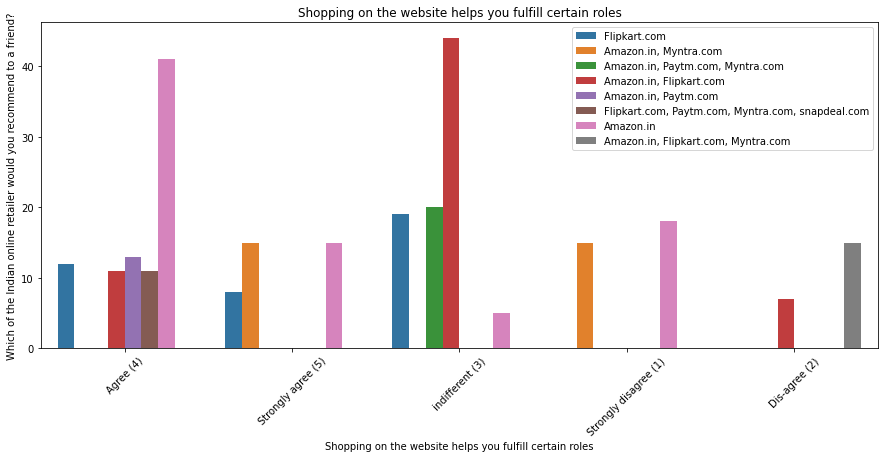

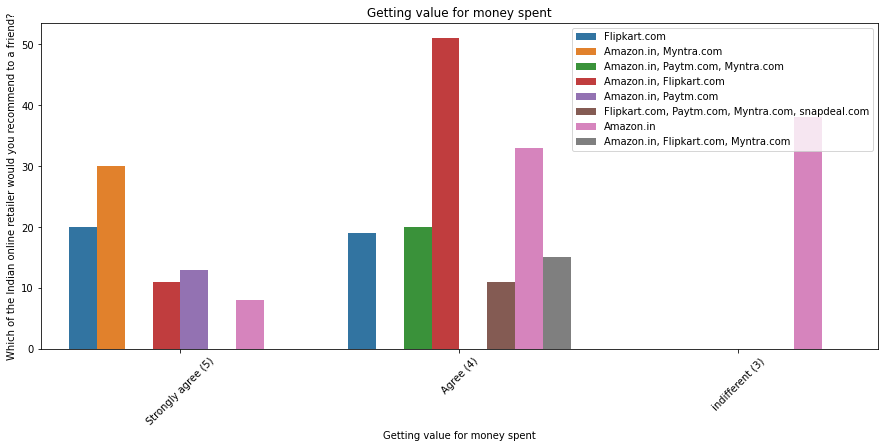

In [21]:
#Policies and commitments
Commitments=['Offering a wide variety of listed product in several category',
       'Provision of complete and relevant product information',
       'Monetary savings',
       'The Convenience of patronizing the online retailer',
       'Shopping on the website gives you the sense of adventure',
       'Shopping on your preferred e-tailer enhances your social status',
       'You feel gratification shopping on your favorite e-tailer',
       'Shopping on the website helps you fulfill certain roles',
       'Getting value for money spent']
for i in Commitments:
        plt.figure(figsize=(15,6))
        
        sns.countplot(data[i],hue=data['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.xlabel(i)
        plt.ylabel('Which of the Indian online retailer would you recommend to a friend?')
        plt.title(i)
        plt.legend(loc="upper right")
        plt.show()

From the above plottings we can infer that most customers of Amazon and flipcart is giving much response regarding the satisfaction of policies.

# Website_Specification

<Figure size 1080x432 with 0 Axes>

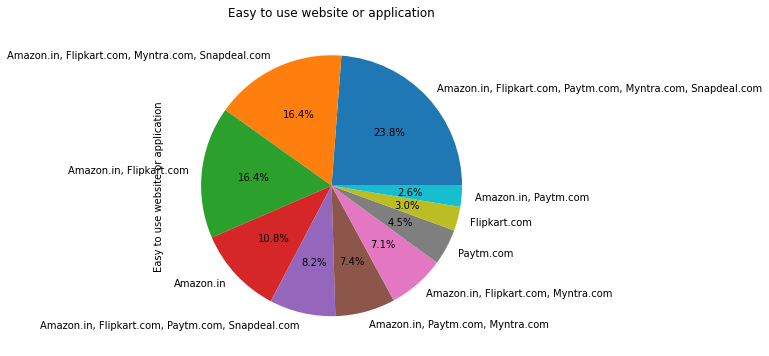

<Figure size 1080x432 with 0 Axes>

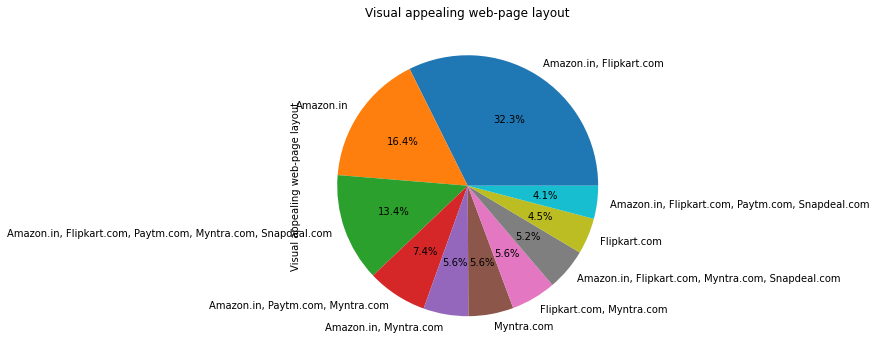

<Figure size 1080x432 with 0 Axes>

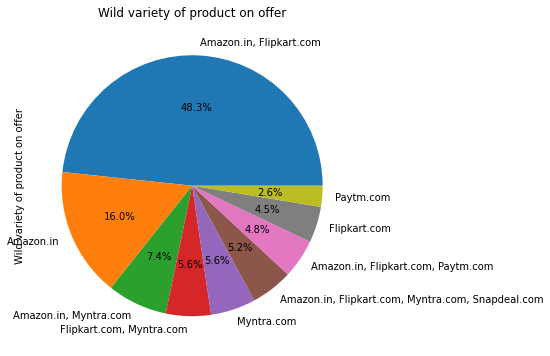

<Figure size 1080x432 with 0 Axes>

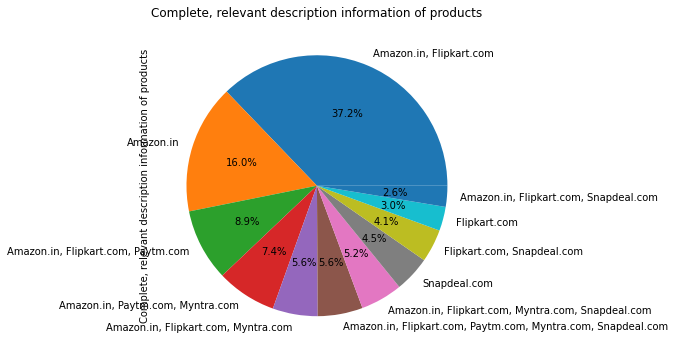

<Figure size 1080x432 with 0 Axes>

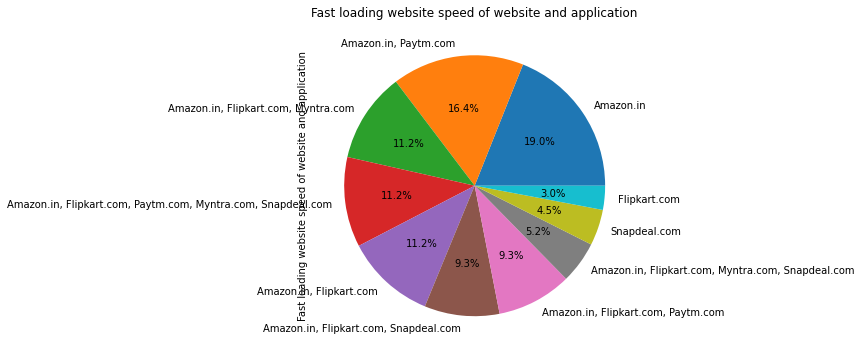

<Figure size 1080x432 with 0 Axes>

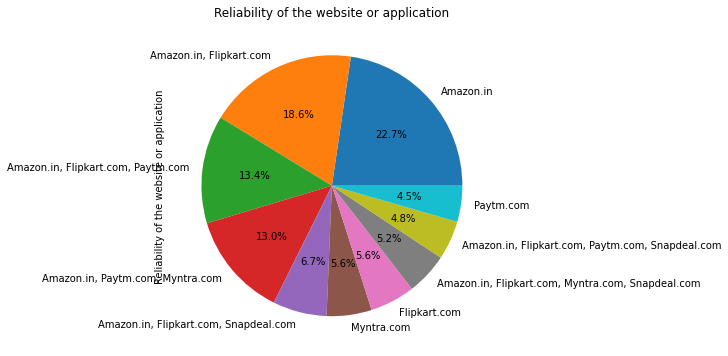

<Figure size 1080x432 with 0 Axes>

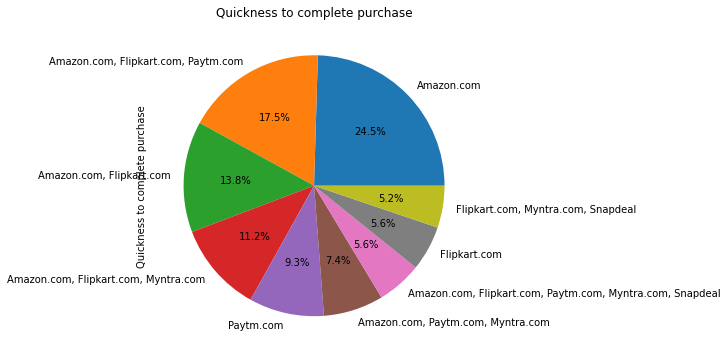

<Figure size 1080x432 with 0 Axes>

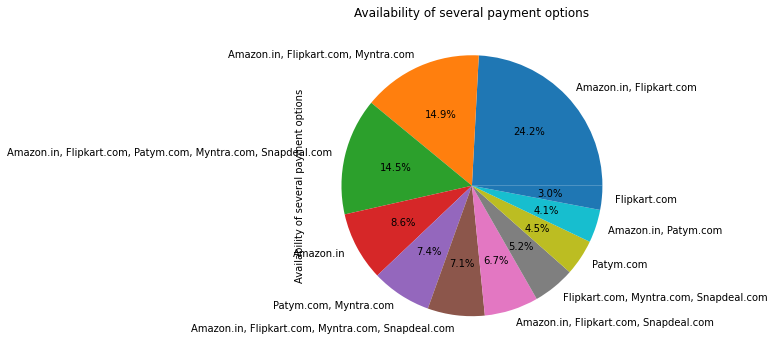

<Figure size 1080x432 with 0 Axes>

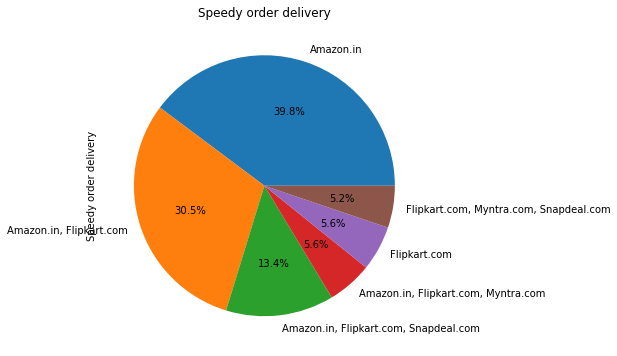

<Figure size 1080x432 with 0 Axes>

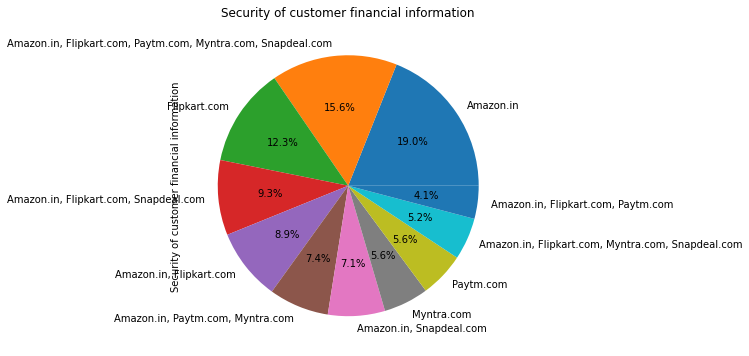

<Figure size 1080x432 with 0 Axes>

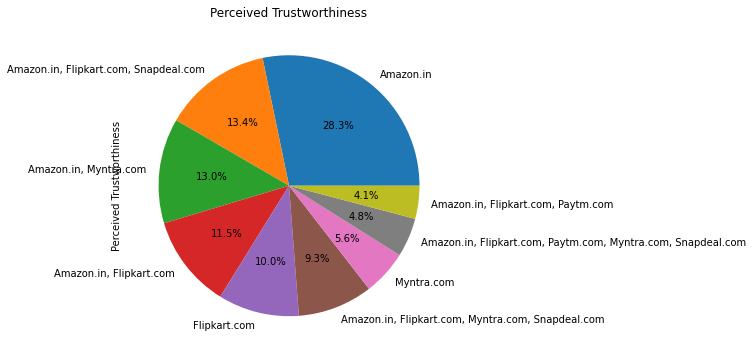

<Figure size 1080x432 with 0 Axes>

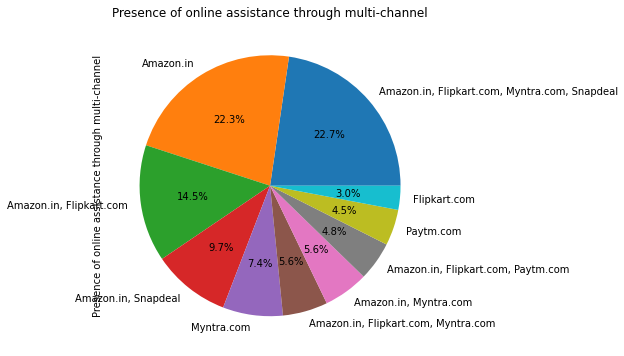

In [29]:
# Website_Specification
Website_Specification=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']
for i in Website_Specification:
        plt.figure(figsize=(15,6))
        
        plt.figure(figsize=(15,6))
        data[i].value_counts().plot.pie(autopct='%1.1f%%',)
       
        
        plt.title(i)
       # plt.legend(loc="best")
        plt.show()

 We can clearly see that Amazon and flipcart are giving their responses most regarding the website specifications and ease of usability. As other sites are less in demnd so getting less feedback on website.

# Dealing with some negetive feedback which is most important part and scope for improvement in the Website 

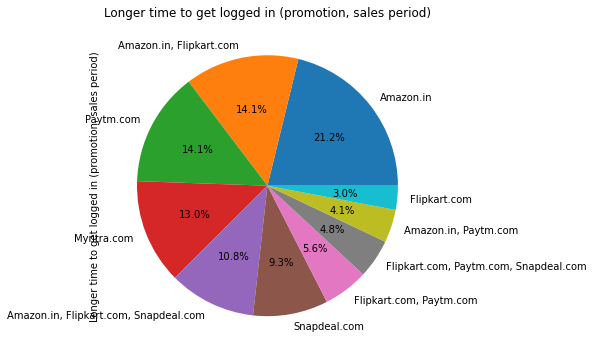

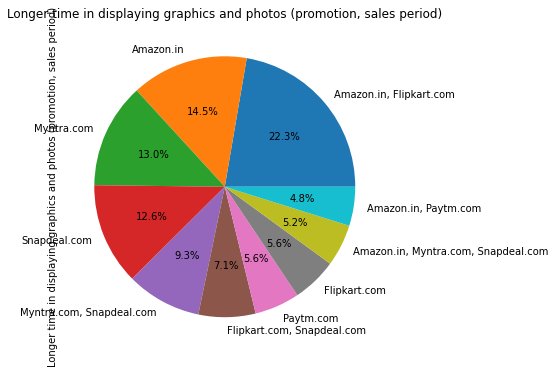

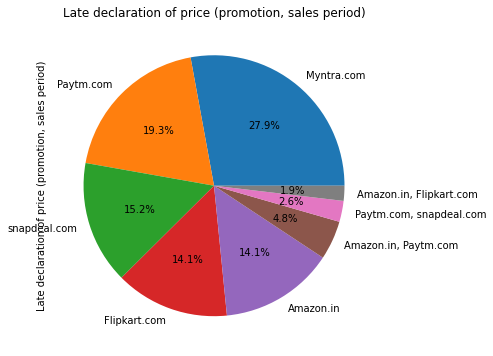

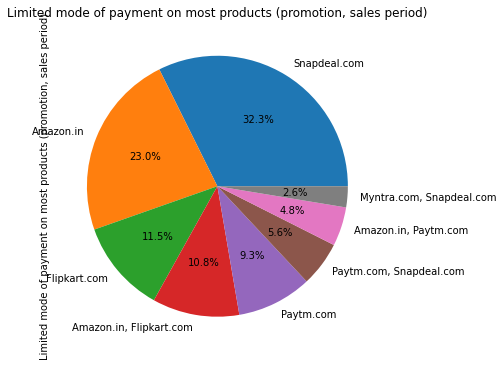

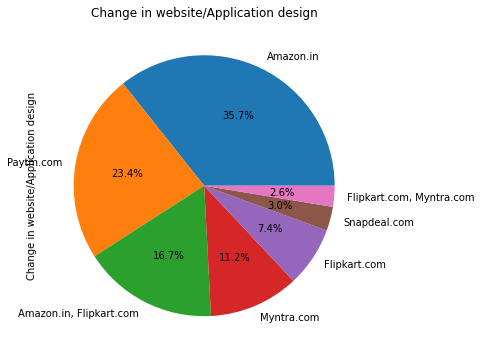

In [30]:
feedbacks=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']
for i in feedbacks:
        plt.figure(figsize=(15,6))
        data[i].value_counts().plot.pie(autopct='%1.1f%%',)
        plt.title(i)
        plt.show()

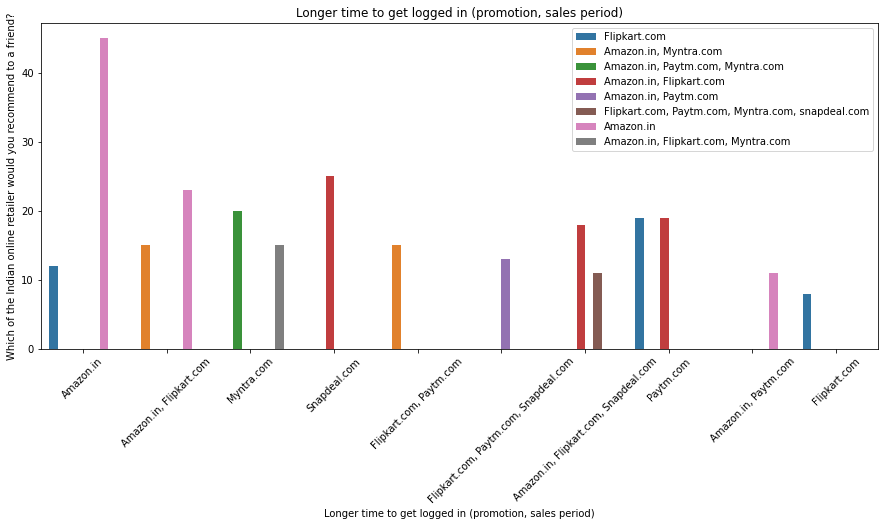

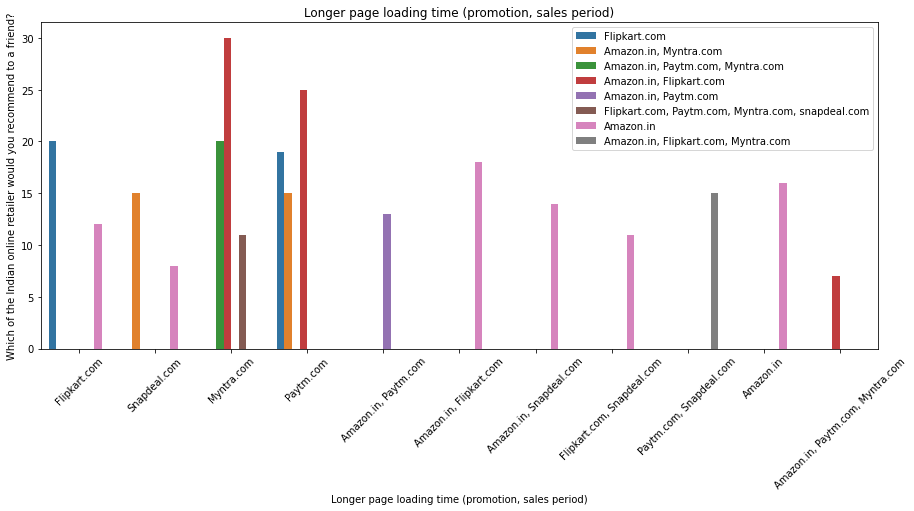

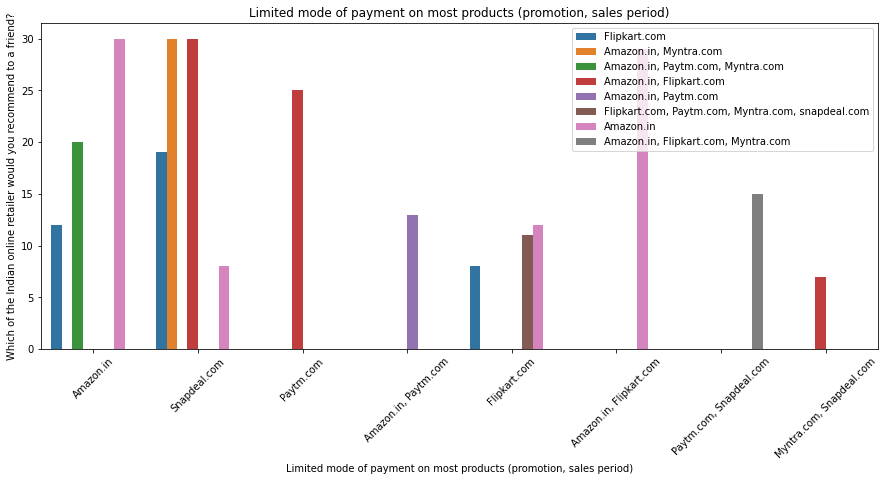

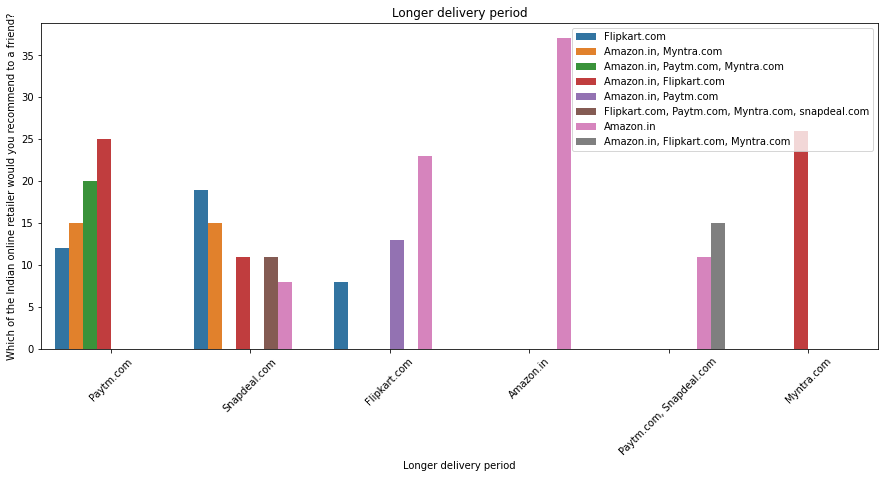

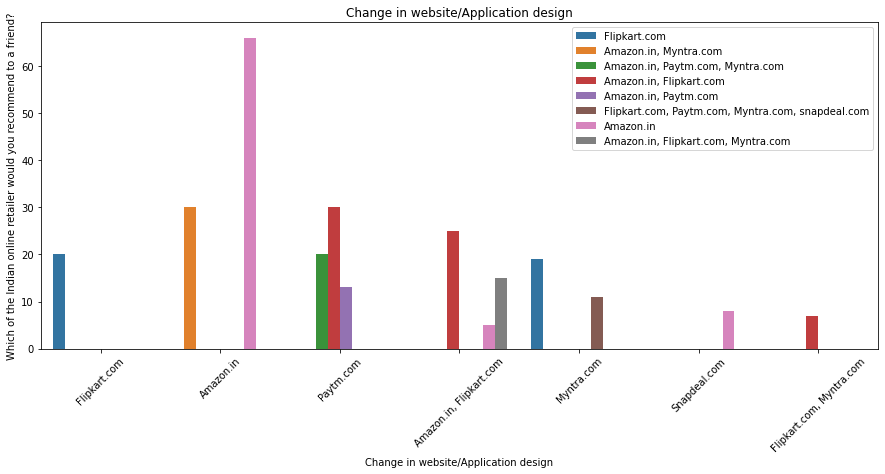

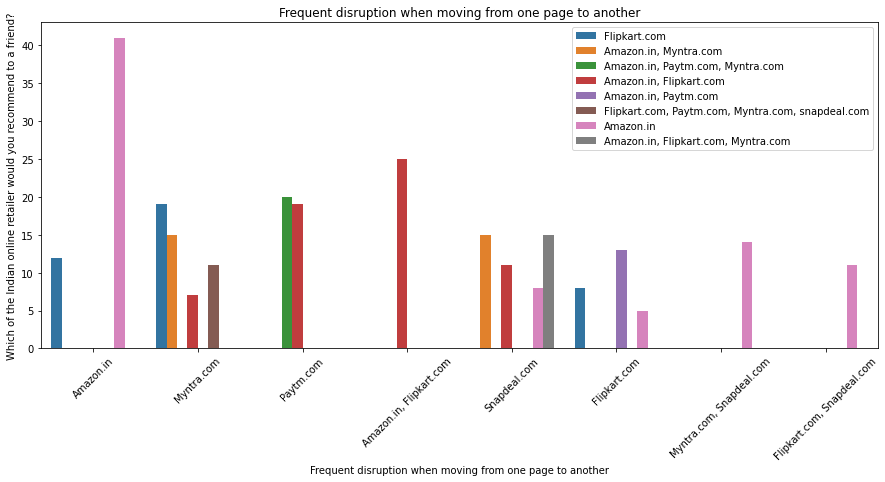

In [25]:
#Collecting all the negative remarks about a brand
feedbacks=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']
for i in feedbacks:
        plt.figure(figsize=(15,6))
        
        sns.countplot(data[i],hue=data['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.xlabel(i)
        plt.ylabel('Which of the Indian online retailer would you recommend to a friend?')
        plt.title(i)
        plt.legend(loc="upper right")
        plt.show()

Customers seem to be more loyal to amazon, flipkart and paytm as even though many of them have given negative remarks
about them still they would recommend these websites to their friend.



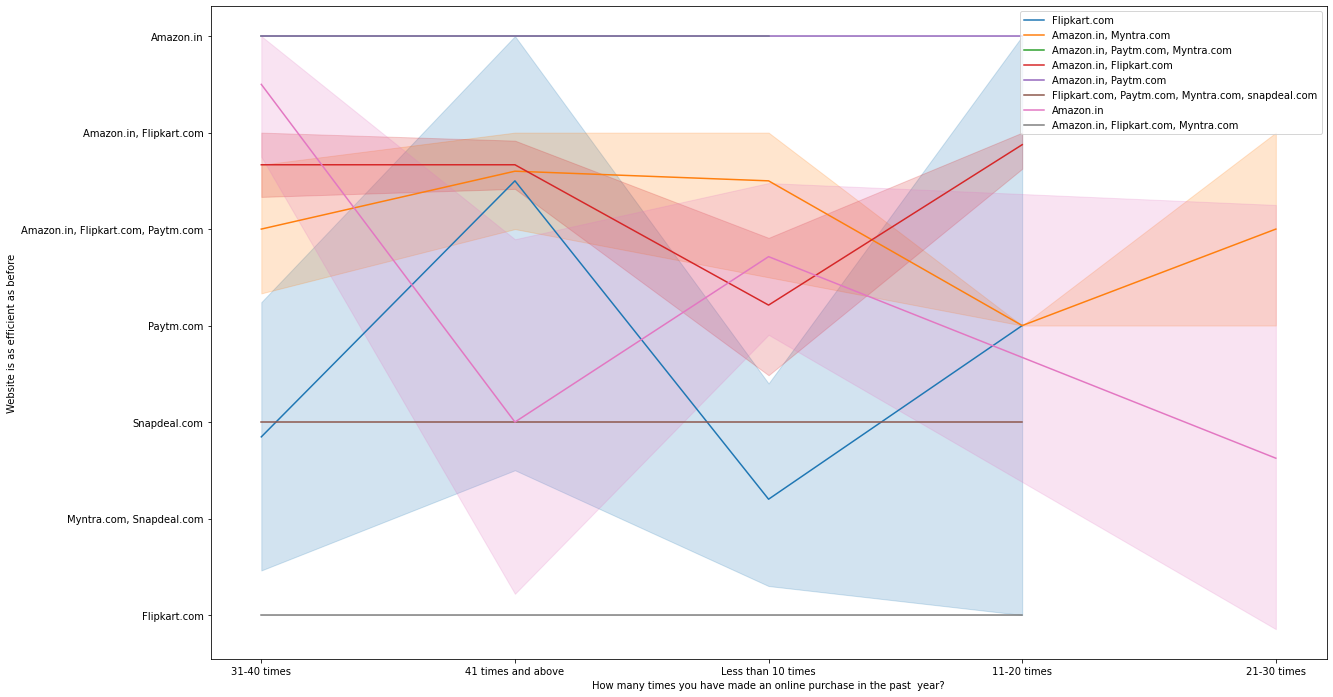

In [50]:
plt.figure(figsize=(20,12))
sns.lineplot(data['How many times you have made an online purchase in the past  year?'],
             data['Website is as efficient as before'],
             hue=data['Which of the Indian online retailer would you recommend to a friend?'])
plt.legend(loc='upper right')

# If we compare all sites highest recommendation is for Amazon alone, then followed by Amazon and Flipcart,then amazon,flipcart,paytm depending on the efficiency of the website as before inspite of any kind osf feedbacks( Positive or negetive)